# 3. Exploratory Crash Data Analysis

This notebook contains exploratory analysis of the 2014-2018 5-year crash data for Champaign County.    
[C-U Traffic Crash Dashboard](https://maps.ccrpc.org/crash-dashboard/) was [created](https://maps.ccrpc.org/crash-dashboard/) to visualize final crash data descriptive analysis.

<img src="../reports/figures/exploratory_crash_data_analysis/cu_traffic_crash_dashboard_v2.PNG">

<a id='exploratory-crash-data-analysis'></a>

**Sections**

- [**3.1. Descriptive analysis**](#descriptive-analysis)
    - [3.1.1 Overview](#overview)
    - [3.1.1 Injury Level](#injury-level)
    - [3.1.3 Roadway and environmental condition](#roadway-and-environmental-conditions)
    - [3.1.4 Monthly, weekly, daily, hourly distribution](#monthly-weekly-daily-hourly-distribution)
    - [3.1.5 Main cause of crash](#main-cause-of-crash)
- [**3.2 Crash mapping**](#crash-mapping)

In [1]:
# Import libraries

# Python data analysis library
import pandas as pd
# Standard Python built-in libraries
from functools import partial
# Numerical libraries
import numpy as np
# Visualization library
import seaborn
# Datashader Big Data Visualization
import datashader as ds
from datashader import transfer_functions as tf
# Convert Longitude-Latitude coordinates into Web Mercator X-Y Values
from datashader.utils import lnglat_to_meters as webm
# Export a datashader plot to an image file (e.g. jpg/png)
from datashader.utils import export_image
# Color Maps
from datashader.colors import colormap_select, Greys9, Hot, viridis, inferno
from matplotlib.cm import hot
import matplotlib.image as mpimg
from colorcet import fire
# Interactive images
from bokeh.plotting import figure, output_notebook, show
from datashader.bokeh_ext import InteractiveImage
# Overlay our data on a Real Map
from bokeh.tile_providers import get_provider, Vendors
get_provider(Vendors.STAMEN_TERRAIN)

WMTSTileSource(id='1001', ...)

In [2]:
# to make this notebook's output stable across runs
np.random.seed(42)
import os
import sys; sys.path.insert(0,'..')

In [3]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [4]:
from src.explor_data_anal import *

Functions included:
- plot_injury_level
- plot_rdwy_env_con
- plot_time_dist
- plot_crash_mapping_XYcoord
- plot_crash_mapping_lnglat
- Champaign_County_bounding
- display_image_in_actual_size
- plot_crash_mapping_WebMercator_XYValues


In [5]:
base_gis_dir  = "G:/CUUATS/Safety Forecasting Tool/"
base_file_dir = "L:/Safety Forecasting Tool/"
base_tool_dir = "L:/Safety_Crash Data Analysis/"

<a id='descriptive-analysis'></a>

# 3.1 Descriptive analysis

<a id='overview'></a>

## 3.1.1 Overview 
[[back to top](#exploratory-crash-data-analysis)]

In [6]:
crashes_5year=pd.read_csv(base_file_dir+"data/interim/crash/crashes_2014_2018.csv")

In [7]:
# A glimpse of the crash records
crashes_5year.head()

ICN  CrashYear  CrashMonth  CrashDay  CrashHour  DayofWeek  \
0  201400252837         14          10         9         12   Thursday   
1  201400271924         14          10         6         14     Monday   
2  201400274386         14          10         8         21  Wednesday   
3  201400252968         14          10         7         17    Tuesday   
4  201400252971         14          10         5         13     Sunday   

           TypeofFirstCrash  TotalFatals  TotalInjured  NoInjuries  ...  \
0                  Rear End            0             1           1  ...   
1  Sideswipe Same Direction            0             0           3  ...   
2              Fixed Object            0             0           1  ...   
3                   Turning            0             0           3  ...   
4                     Angle            0             0           2  ...   

   CityTownshipFlag        CityName  IntersectionRelated HitAndRun  \
0                 C         Rantoul                    Y         N   
1                 C       Champaign                    Y         Y   
2                 T  Unincorporated                    N         N   
3                 C       Champaign                    Y         N   
4                 C       Champaign                    Y         N   

   RailroadCrossingNumber TSCrashCoordinateX TSCrashCoordinateY TSCrashLat  \
0              (N/A)            2.862743e+06       1.334056e+06  40.312120   
1              (N/A)            2.830280e+06       1.267747e+06  40.132176   
2              (N/A)            2.839956e+06       1.294578e+06  40.205213   
3              (N/A)            2.825400e+06       1.254115e+06  40.095060   
4              (N/A)            2.831068e+06       1.259330e+06  40.109038   

   TSCrashLong    MPA  
0     -88.1365  False  
1     -88.2580   True  
2     -88.2213  False  
3     -88.2765   True  
4     -88.2558   True  

[5 rows x 46 columns]

In [8]:
# Number of crashes in each year
crashes_5year['CrashYear'].value_counts() 
# There are more than 3,300 crashes per year 

18    3557
16    3538
17    3477
14    3333
15    3305
Name: CrashYear, dtype: int64

In [9]:
# Recorded crash info for each crash record
crashes_5year.columns

Index(['ICN', 'CrashYear', 'CrashMonth', 'CrashDay', 'CrashHour', 'DayofWeek',
       'TypeofFirstCrash', 'TotalFatals', 'TotalInjured', 'NoInjuries',
       'Ainjuries', 'Binjuries', 'Cinjuries', 'CrashInjuriesSeverity',
       'NumberofVehicles', 'Cause1', 'Cause2', 'RoadwayFunctionalClass',
       'RouteNumbers', 'ClassofTrafficway', 'NHS', 'RoadSurfaceCond',
       'RoadDefects', 'LightCondition', 'WeatherCondition', 'NumberofLanes',
       'RoadAlignment', 'TrafficwayDescrip', 'TrafficControlDevice',
       'TrafficControlDeviceCondition', 'Vehicle_1_Type', 'Vehicle_2_Type',
       'Vehicle_3_Type', 'Vehicle_4_Type', 'heavy', 'WorkZoneRelated',
       'CityTownshipFlag', 'CityName', 'IntersectionRelated', 'HitAndRun',
       'RailroadCrossingNumber', 'TSCrashCoordinateX', 'TSCrashCoordinateY',
       'TSCrashLat', 'TSCrashLong', 'MPA'],
      dtype='object')

<a id='injury-level'></a>

## 3.1.2 Injury level 
[[back to top](#exploratory-crash-data-analysis)]

Plotting crash injury level statistics for each year
Injury level figures saved


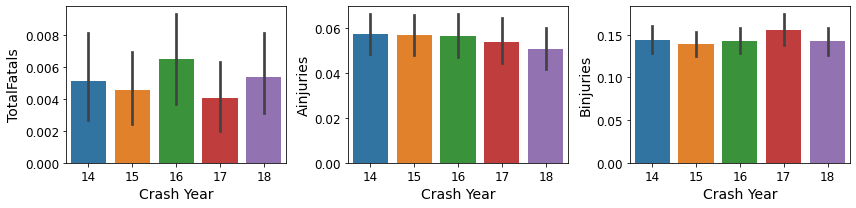

In [10]:
plot_injury_level(crashes_5year)

<a id='roadway-and-environmental-conditions'></a>

## 3.1.3 Roadway and environmental conditions 
[[back to top](#exploratory-crash-data-analysis)]

Plotting statistics of roadway features, environmental conditions and crash types
Figures of roadway features, environmental conditions and crash types statistics saved


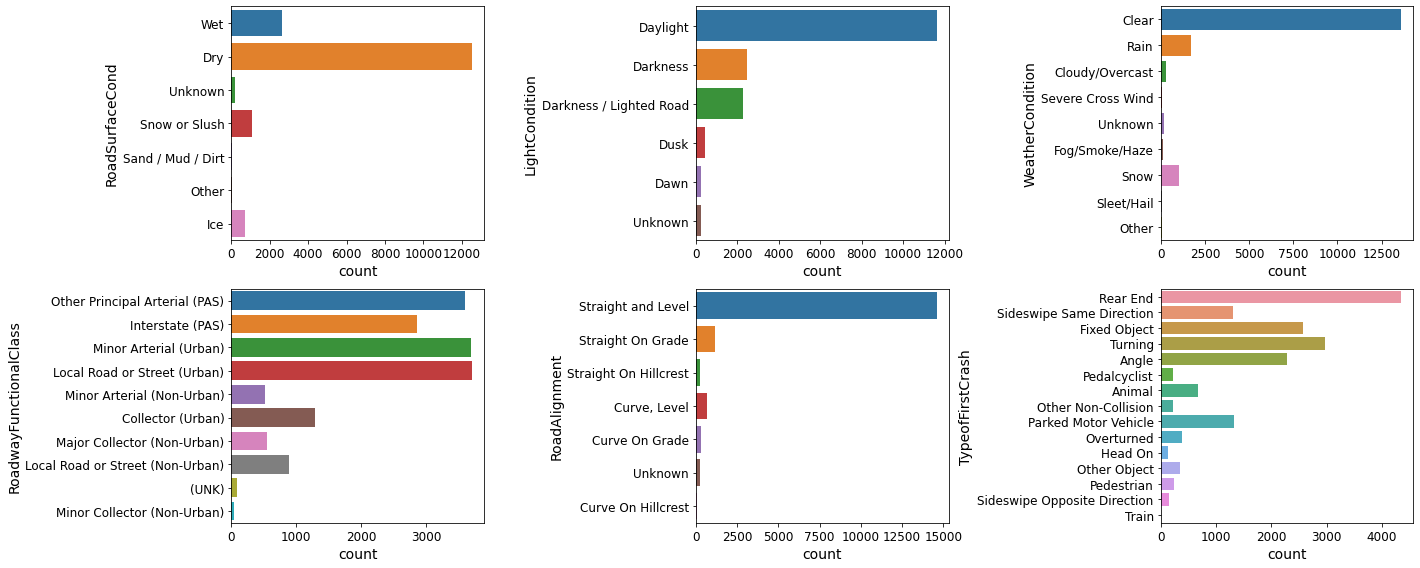

In [11]:
plot_rdwy_env_con(crashes_5year)

<a id='monthly-weekly-daily-hourly-distribution'></a>

## 3.1.4 Monthly, weekly, daily, hourly distribution 
[[back to top](#exploratory-crash-data-analysis)]

Plotting Monthly, weekly, daily, hourly distribution bar chart
Time distribution figures saved


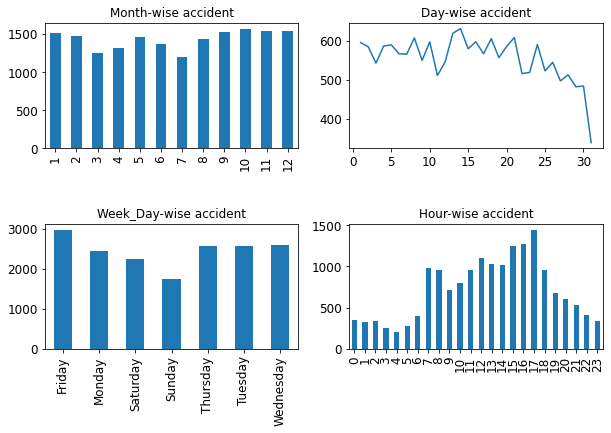

In [12]:
plot_time_dist(crashes_5year)

<a id='main-cause-of-crash'></a>

## 3.1.5 Main cause of crash 
[[back to top](#exploratory-crash-data-analysis)]

**Findings**:
- <span style="color:red"> Only 55 </span> crashes over the course of 5 years are due to <span style="color:red"> "Road Engineering/Surface/Marking defects"</span>. 
- <span style="color:red"> Vast majority </span> of the crashes are due to <span style="color:red"> human error </span>, including "Failing to reduce speed to avoid crash", "Failing to yield to right of way", "Improper lane usage", etc.

In [13]:
crashes_5year['Cause1'].value_counts().sort_values(ascending=False)

Failing to Reduce Speed to Avoid Crash                                           3386
Failing to Yield Right of Way                                                    3009
Improper Lane Usage                                                              1752
Unable to Determine                                                               852
Following Too Closely                                                             797
Exceeding Safe Speed For Conditions                                               794
Weather                                                                           782
Animal                                                                            735
Disregarding Traffic Signals                                                      627
Driving Skills/Knowledge/Experience                                               536
Improper Backing                                                                  478
Under Influence of Alcohol/Drugs                      

<a id='crash-mapping'></a>

# 3.2 Crash mapping
[[back to top](#exploratory-crash-data-analysis)]

Reference: Johnny Chan, https://nbviewer.jupyter.org/github/Atlas7/visualize-traffic-accidents-in-uk/tree/master/notebooks/

Plotting crash mapping with X,Y coordinates
Crash mapping with X,Y coordinates figure saved


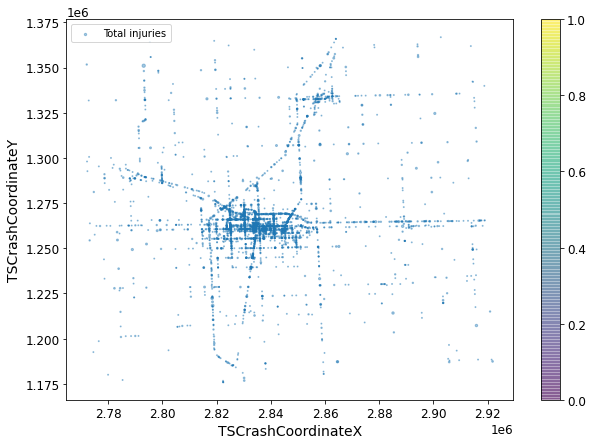

In [14]:
plot_crash_mapping_XYcoord(crashes_5year)

Plotting crash mapping with longitude and latitude
Crash mapping with longitude and latitude figure saved


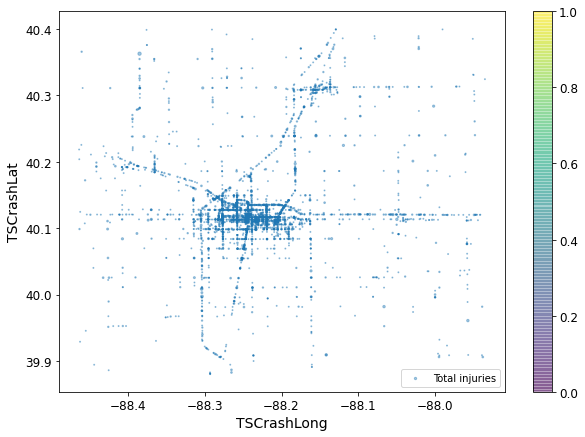

In [15]:
plot_crash_mapping_lnglat(crashes_5year)

Plotting crash mapping with WebMercator X,Y values
Champaign County Bounding Box
  - in lng/lat ranges: ((-88.8418, -87.5001), (39.8727, 40.4123))
  - in Web Mercator X-Y ranges:
    - x_range: [-9889823.93715785 -9740466.57636052]
    - y_range: [4847460.5977226  4926038.73029303]
  - in Plot width: 1500, Plot height: 789
Crash mapping with WebMercator XY values figure saved


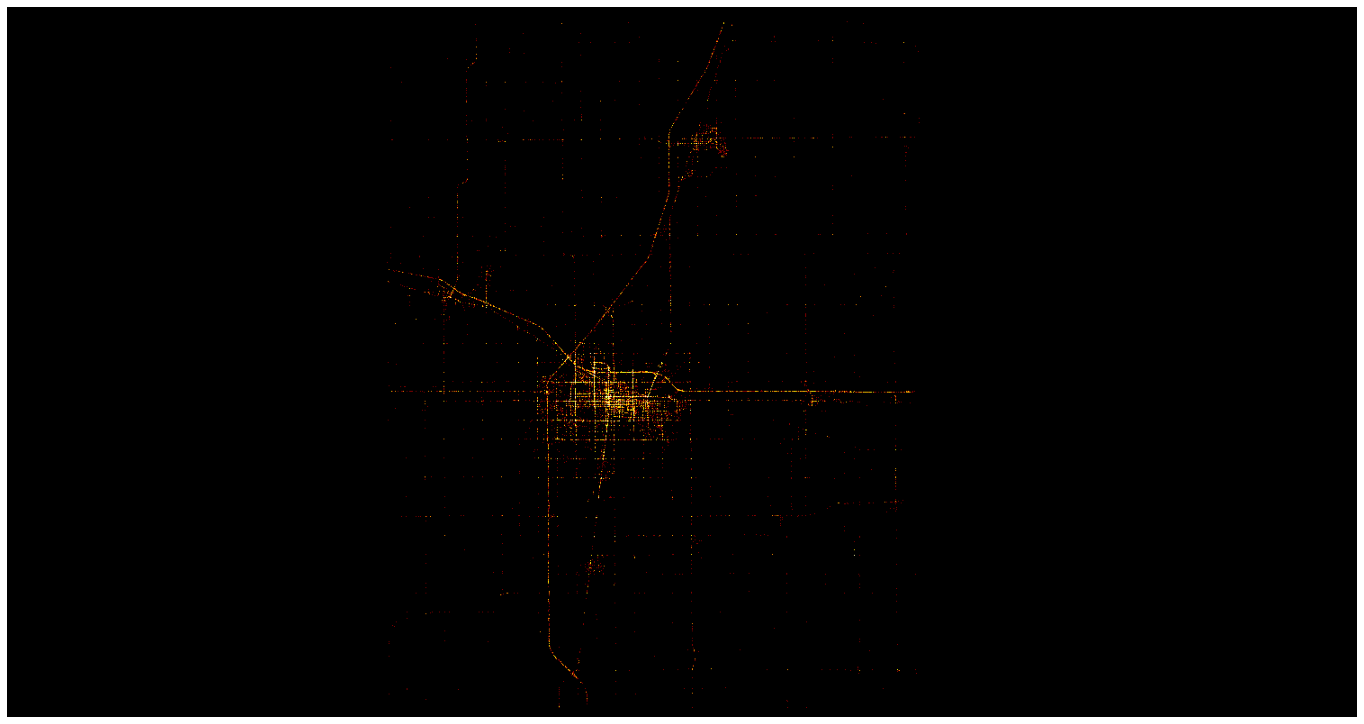

In [16]:
plot_crash_mapping_WebMercator_XYValues(crashes_5year)